Extra Info: First Model developed for computer vision tasks was Lenet-5

### Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.utils.set_random_seed(111)

import warnings
warnings.filterwarnings('ignore')

### Downloading the dataset

In [2]:
!gdown 1ut62n4Mp0iBVzX1w8S0tnZi1Fv5fAFpN

Downloading...
From (original): https://drive.google.com/uc?id=1ut62n4Mp0iBVzX1w8S0tnZi1Fv5fAFpN
From (redirected): https://drive.google.com/uc?id=1ut62n4Mp0iBVzX1w8S0tnZi1Fv5fAFpN&confirm=t&uuid=8ea95b80-a072-4af1-9878-a8f88ddb512c
To: /content/Landmarks.zip
100% 112M/112M [00:03<00:00, 34.3MB/s]


In [3]:
!unzip Landmarks.zip

Archive:  Landmarks.zip
   creating: New_landmark_images/
   creating: New_landmark_images/train/
   creating: New_landmark_images/train/01.Niagara_Falls/
  inflating: New_landmark_images/train/01.Niagara_Falls/176bf33159dd4780.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/43e7e6b715dea27a.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/4a18c9d51c84df27.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/032a10a9b60eae53.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/519776646d035f06.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/6a6cd26155db4327.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/7a1ddf7a6ae3436d.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/7398dbeba39b5fb7.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/54be916f53092ef8.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls/292419d3147c4a34.jpg  
  inflating: New_landmark_images/train/01.Niagara_Falls

<center> <img src="https://drive.google.com/uc?id=1H-aKMDFStj7GFbfGyiAJvB00G7m6jt3A"></center>
  <caption><center> <font color='blue'> Figure: <font color='blue'>  : AlexNet Architecture<br>  </center></caption>

#### Preprocessing
 - Resizing (227,227,3)
 - Normalization (0-1)

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory("New_landmark_images/train/",
                                                         shuffle=True, seed=123,
                                                         image_size=(227, 227), batch_size=32)
val_data   = tf.keras.utils.image_dataset_from_directory("New_landmark_images/validation/",
                                                         shuffle=False, seed=123,
                                                         image_size=(227, 227), batch_size=32)
test_data  = tf.keras.utils.image_dataset_from_directory("New_landmark_images/test/",
                                                         shuffle=False, seed=123,
                                                         image_size=(227, 227), batch_size=32)

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [6]:
data_preprocess = tf.keras.Sequential(
                  name="data_preprocess",
                  layers=[layers.Rescaling(1.0/255),]
                  )

train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

In [7]:
class_dirs = os.listdir("New_landmark_images/train/")
image_dict = {} # dict to store image array(key) for every class(value)
count_dict = {} # dict to store count of files(key) for every class(value)

for cls in class_dirs:
    file_paths = glob.glob(f'New_landmark_images/train/{cls}/*')
    count_dict[cls] = len(file_paths)
    image_path = random.choice(file_paths)
    image_dict[cls] = tf.keras.utils.load_img(image_path)

In [8]:
image_dict

{'01.Niagara_Falls': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x261>,
 '10.Great_Wall_of_China': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600>,
 '07.Forth_Bridge': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600>,
 '08.Gateway_of_India': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x529>,
 '03.Kantanagar_Temple': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600>,
 '04.Eiffel_Tower': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x533>,
 '02.Golden_Gate_Bridge': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x533>,
 '09.Machu_Picchu': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=799x600>,
 '06.Hanging_Temple': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x531>,
 '05.Washington_Monument': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x600>}

In [9]:
count_dict

{'01.Niagara_Falls': 66,
 '10.Great_Wall_of_China': 72,
 '07.Forth_Bridge': 82,
 '08.Gateway_of_India': 87,
 '03.Kantanagar_Temple': 88,
 '04.Eiffel_Tower': 64,
 '02.Golden_Gate_Bridge': 70,
 '09.Machu_Picchu': 55,
 '06.Hanging_Temple': 70,
 '05.Washington_Monument': 83}

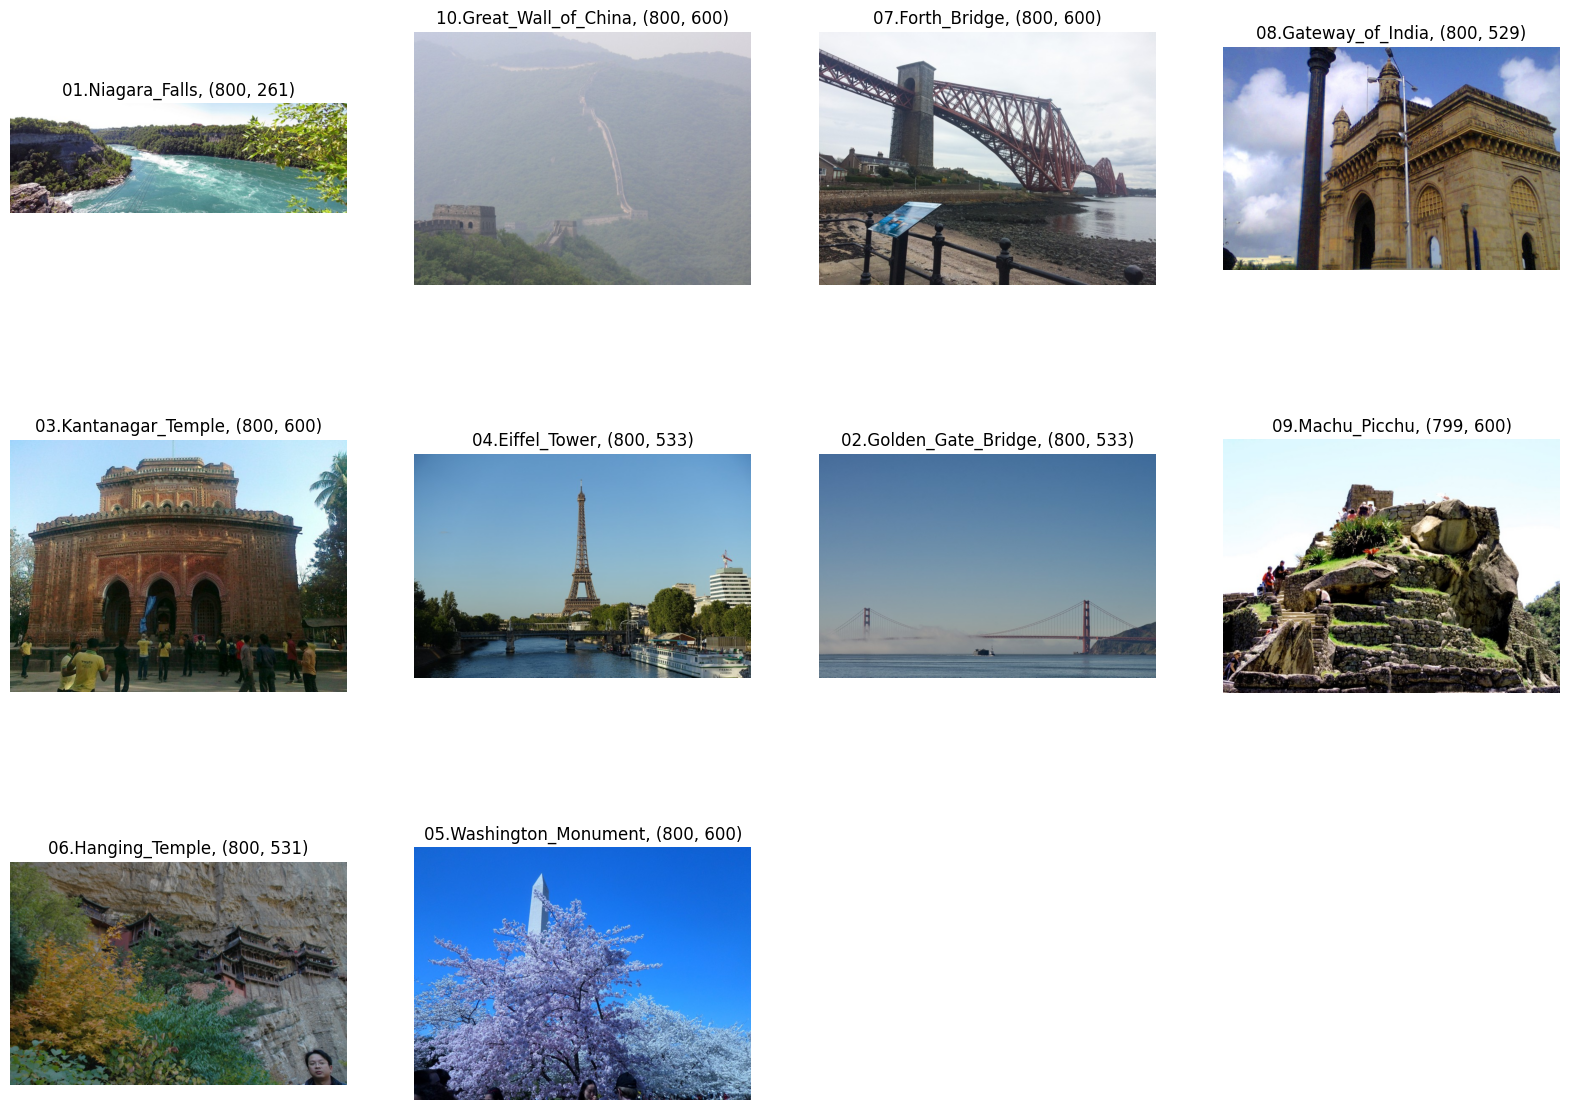

In [10]:
plt.figure(figsize=(20, 15))

for i, (cls,img) in enumerate(image_dict.items()):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

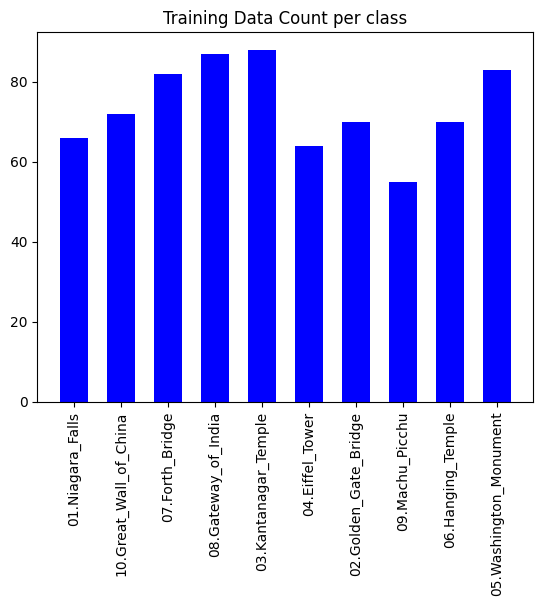

In [22]:
plt.bar(x=count_dict.keys(), height=count_dict.values(), color='blue', width=0.6)
plt.xticks(rotation=90)
plt.title("Training Data Count per class")
plt.show()

####What is top-k accuracy ?
In top-k accuracy, we get score if the right answer appears in top k guesses.
<!-- <img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/615/original/Screenshot_2023-09-06_at_11.34.15_AM.png?1693980284 width=800> -->

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/046/616/original/Screenshot_2023-09-06_at_11.34.20_AM.png?1693980334 width=800>

In some cases, It is very diffcult to predict all labels correctly thus an intuitive approach is to use top-k accuracy metric for evaluting the performace of the models




<center><img src='https://drive.google.com/uc?id=1SKNQNRhW4Aw7sAFNXEWbkaBHfjnPSERX' ></center>
<caption><center> <font color='blue'> Figure: <font color='blue'>  : AlexNet layers Computation<br>  </center></caption>

  


- AlexNet has 5 CONV layers and 3 FC layers
- AlexNet has 60M parameters.

<hr>

### VGGNet
- It improves on AlexNet by being much deeper
- It has 16 layers(13 convolution (CONV) + 3 Fully connected layers(FC))
- VGG19 has 19 layers (16 CONV + 3 FC)


<center> <img src="https://drive.google.com/uc?id=1xLiyqRCaGmGHmZIIToZsuBW69QVY38js"></center>
  <caption><center> <font color='blue'> Figure: <font color='blue'>  : VGG16 Architecture<br>  </center></caption>




<center> <img src="https://drive.google.com/uc?id=1DowFLEFRPCS-KieZTftVq8NKfF-kJj_a"></center>
  <caption><center> <font color='blue'> Figure: <font color='blue'>  VGG16 layers Computation<br>  </center></caption>

- VGGNet uses only 3x3 filters, whereas Alexnet had 11x11, 3x3 and 5x5 filters
- Two 3x3 filters applied in sequence have a total of 2 * 3 * 3 = 18 learnable parameters whereas a single 5x5 filter has 5 * 5 = 25 learnable weights.
- Two 3x3 filters have more non-linearity than 5x5 filters as the activation function has been applied 2 times
- Having more non-linearity means the neural network is able to learn more complex non-linear representation of input


### Data Processing:
- Resizing: VGGNet expects input image to be of (224,224,3) in size
- Rescaling

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory("New_landmark_images/train/", shuffle=True, seed=123,
                                                       image_size=(224,224), batch_size=128)
val_ds   = tf.keras.utils.image_dataset_from_directory("New_landmark_images/validation/", shuffle=False, seed=123,
                                                       image_size=(224,224), batch_size=128)
test_ds = tf.keras.utils.image_dataset_from_directory("New_landmark_images/test/", shuffle=False, seed=123,
                                                      image_size=(224,224), batch_size=128)

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [27]:
data_preprocess = tf.keras.Sequential(
                  name="data_preprocess",
                  layers=[layers.Rescaling(1.0/255),]
                  )

train_ds = train_ds.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_ds.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
# lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [34]:
vgg16_model = tf.keras.Sequential([
              layers.Input(shape = (224 ,224, 3)),

              layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
              layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

              layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
              layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

              layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
              layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

              layers.Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'),
              layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

              layers.Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'),

              layers.Conv2D(512, kernel_size=(3,3), padding='same', activation='relu'),
              layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

              layers.Flatten(),
              layers.Dense(10, activation= 'softmax')
            ])

In [35]:
vgg16_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │         250,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,965,578 (57.09 MB)

 Trainable params: 14,965,578 (57.09 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
import functools
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

In [37]:
vgg16_model.compile(
            optimizer = keras.optimizers.SGD(learning_rate=0.005, momentum=0.99),
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']
           )

In [38]:
history = vgg16_model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 261s 28s/step - accuracy: 0.1046 - loss: 2.3025 - val_accuracy: 0.0968 - val_loss: 2.3025
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.1182 - loss: 2.3016 - val_accuracy: 0.1290 - val_loss: 2.3025
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.1330 - loss: 2.3006 - val_accuracy: 0.1226 - val_loss: 2.3027
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1333 - loss: 2.2986 - val_accuracy: 0.1161 - val_loss: 2.3035
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.1297 - loss: 2.2971 - val_accuracy: 0.1032 - val_loss: 2.3050


In [45]:
# Saving the Model
vgg16_model.save("vgg16_model_scratch.keras")

In [46]:
# Loading the model
vgg16_model_scratch = tf.keras.models.load_model("/content/vgg16_model_scratch.keras")

In [47]:
# Downloading the saved model from Google drive
# !gdown 1dwwgrguj9NDIgdnFfdnYZoMsBFVMD3xV

In [48]:
def training_plot(metrics, history):
  fig, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

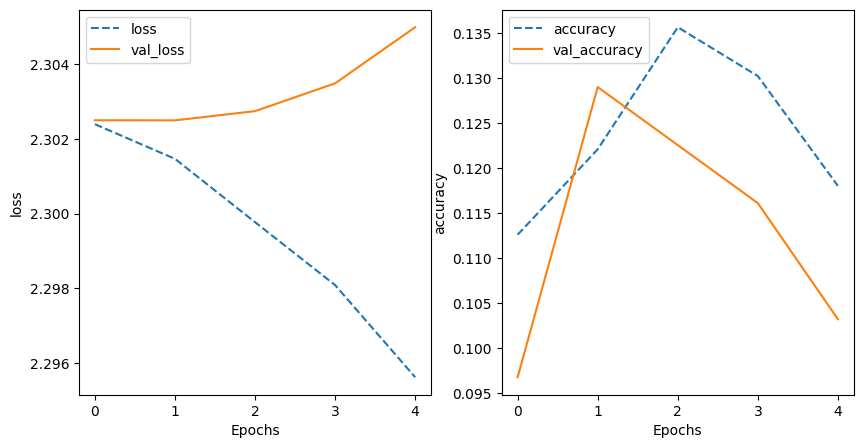

In [49]:
training_plot(['loss', 'accuracy'], history)

In [51]:
# Evaluate the model
loss, acc = vgg16_model_scratch.evaluate(test_ds, verbose=2)

# displays only the final evaluation results per batch, without a progress bar

1/1 - 0s - 417ms/step - accuracy: 0.1163 - loss: 2.3044


In [52]:
print(f"Restored Model Accuracy: {acc}%")

Restored Model Accuracy: 0.11627907305955887%


- The model gives poor performance with an accuracy of on 11.6% on the test data
- This is because the dataset size is small when it comes to train VGG from scratch

<hr>

## **Transfer Learning in CNN**

  It is a mechanism where a model trained on one task is reused or fine-tuned for a different but related task. Instead of training a model from scratch, we take a pre-trained model (usually trained on a large dataset) and adapt it to our specific needs.


**Why we require Transfer learning?**
- Training deep learning models from scratch requires large datasets and significant computational power. Transfer learning allows us to use pre-trained models, reducing training time and computational cost and achieving high accuracy
- Once training begins, the generic layers (which forms majority of the new model) are kept frozen (i.e., they are unmodifiable), whereas the newly added task-specific layers are allowed to be modified.
- This is how transfer learning helps quickly train new models


<img src='https://drive.google.com/uc?id=14w0JUnKfbC8XkaRIsZjdAsiAMSLYclVo'>



## **Transfer Learning using VGGNet architecture**

In [56]:
# Get the first few blocks of pretrained model and freeze them
# ImageNet dataset wa trained on 1.4 million images and 1000 classes

pretrained_model = tf.keras.applications.VGG16(weights='imagenet',   # load pre-trained weights from the ImageNet dataset
                                               include_top=False,    # Removes fully connected layers keeping only the convolutional layers
                                               input_shape=[224,224,3])
pretrained_model.trainable=False
# The model's weights will not be updated during training, only the custom layers added on top will be trained

In [57]:
vgg16_model = tf.keras.Sequential([
                  pretrained_model,
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(10, activation='softmax')
              ])

In [58]:
vgg16_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │         250,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,965,578 (57.09 MB)

 Trainable params: 250,890 (980.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [59]:
# import functools
# top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

vgg16_model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
          )

In [60]:
history = vgg16_model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.2149 - loss: 2.4971 - val_accuracy: 0.5290 - val_loss: 1.5262
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 747ms/step - accuracy: 0.6563 - loss: 1.0671 - val_accuracy: 0.7548 - val_loss: 0.7802
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 747ms/step - accuracy: 0.8075 - loss: 0.5548 - val_accuracy: 0.7871 - val_loss: 0.6461
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 746ms/step - accuracy: 0.9009 - loss: 0.3213 - val_accuracy: 0.8129 - val_loss: 0.6217
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 711ms/step - accuracy: 0.9504 - loss: 0.2392 - val_accuracy: 0.8387 - val_loss: 0.5321


By training VGG16 using transfer learning we are able to obtain validation accuracy of 0.8387 after 5 epochs where as VGGNet created from scratch had validation accuracy of 0.1032<br>
Using transfer learnng we obtain higher accuracy and require less training


In [61]:
# Saving the Model
vgg16_model_pretrained = vgg16_model.save("vgg16_model_pretrained.keras")

In [63]:
# # Download the saved model from Google Drive
# !gdown 15SJVnO_XxBnHWy98kJe4k6sQ1u3a6tnA

# Loading the model
vgg16_model_pretrained = tf.keras.models.load_model("/content/vgg16_model_pretrained.keras")

In [64]:
def training_plot(metrics, history):
  fig, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

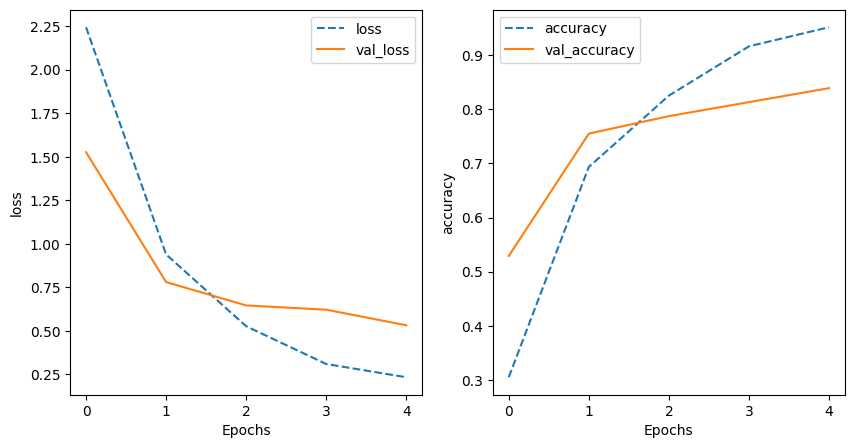

In [65]:
training_plot(['loss', 'accuracy'], history)

In [68]:
# Evaluate the model
loss, acc = vgg16_model_pretrained.evaluate(test_ds, verbose=2)

# displays only the final evaluation results per batch, without a progress bar

1/1 - 1s - 1s/step - accuracy: 0.7907 - loss: 0.5887


In [69]:
print(f"Restored Model Accuracy: {acc}%")

Restored Model Accuracy: 0.7906976938247681%


### **Shortcomings of VGG Net:**
- It has 14 Million parameters which takes aprox 500 Mb to store
- Majority of the parameters are coming from last 3 FC layers
- Convolutional part only has 20 million weights
- Conv are more important than FC layers, as they capture the feature from the image
- No use of Global Average Pooling (GAP) while going from Conv layers to FC layers